<a href="https://colab.research.google.com/github/andresakmr/risco-relativo/blob/main/proj_03_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the datasets
user_info_df = pd.read_csv('/content/user_info.csv')
loans_outstanding_df = pd.read_csv('/content/loans_outstanding.csv')
loans_detail_df = pd.read_csv('/content/loans_detail.csv')
default_df = pd.read_csv('/content/default.csv')

# Check for null values in each DataFrame
print("Null values in user_info.csv:")
print(user_info_df.isnull().sum())

print("\nNull values in loans_outstanding.csv:")
print(loans_outstanding_df.isnull().sum())

print("\nNull values in loans_detail.csv:")
print(loans_detail_df.isnull().sum())

print("\nNull values in default.csv:")
print(default_df.isnull().sum())

# Replace null values with the median
user_info_df['last_month_salary'] = user_info_df['last_month_salary'].fillna(user_info_df['last_month_salary'].median())
user_info_df['number_dependents'] = user_info_df['number_dependents'].fillna(user_info_df['number_dependents'].median())

print("\nNull values in user_info.csv after imputation:")
print(user_info_df.isnull().sum())

Null values in user_info.csv:
user_id                 0
age                     0
sex                     0
last_month_salary    7199
number_dependents     943
dtype: int64

Null values in loans_outstanding.csv:
loan_id      0
user_id      0
loan_type    0
dtype: int64

Null values in loans_detail.csv:
user_id                                         0
more_90_days_overdue                            0
using_lines_not_secured_personal_assets         0
number_times_delayed_payment_loan_30_59_days    0
debt_ratio                                      0
number_times_delayed_payment_loan_60_89_days    0
dtype: int64

Null values in default.csv:
user_id         0
default_flag    0
dtype: int64

Null values in user_info.csv after imputation:
user_id              0
age                  0
sex                  0
last_month_salary    0
number_dependents    0
dtype: int64


In [ ]:
# Merge the dataframes
merged_df = pd.merge(user_info_df, default_df, on='user_id', how='left')
merged_df = pd.merge(merged_df, loans_detail_df, on='user_id', how='left')
merged_df = pd.merge(merged_df, loans_outstanding_df, on='user_id', how='left')

# Display the first few rows of the merged dataframe
display(merged_df.head())

# Check the shape of the merged dataframe
print("\nShape of the merged dataframe:", merged_df.shape)

,user_id,age,sex,last_month_salary,number_dependents,default_flag,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,loan_id,loan_type
0,1,55,F,2200.0,0.0,0,0,0.667083,0,0.153112,0,36563.0,other
1,1,55,F,2200.0,0.0,0,0,0.667083,0,0.153112,0,36564.0,other
2,1,55,F,2200.0,0.0,0,0,0.667083,0,0.153112,0,36565.0,other
3,2,44,M,7499.0,0.0,0,0,0.007093,0,0.148800,0,1.0,real estate
4,2,44,M,7499.0,0.0,0,0,0.007093,0,0.148800,0,36566.0,other



Shape of the merged dataframe: (305760, 13)


In [ ]:
# Check for duplicate rows
duplicate_rows = merged_df.duplicated().sum()
print(f"Number of duplicate rows in the merged dataframe: {duplicate_rows}")

Number of duplicate rows in the merged dataframe: 0


In [ ]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr(numeric_only=True)

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Calculate the standard deviation of each column
standard_deviation = merged_df.std(numeric_only=True)

# Display the standard deviation
print("\nStandard Deviation of each column:")
display(standard_deviation)

Correlation Matrix:


,user_id,age,last_month_salary,number_dependents,default_flag,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,loan_id
user_id,1.000000,0.006066,-0.005144,-0.003680,-0.007951,-0.000344,-0.003262,-0.002355,0.000729,-0.002329,0.791047
age,0.006066,1.000000,0.008287,-0.258602,-0.063918,-0.036128,-0.009002,-0.051495,0.015499,-0.032967,0.016351
last_month_salary,-0.005144,0.008287,1.000000,0.071294,-0.014867,-0.007003,0.003194,-0.004941,-0.023434,-0.003946,-0.019148
number_dependents,-0.003680,-0.258602,0.071294,1.000000,0.027730,0.002105,0.005720,0.017233,-0.033319,0.002279,-0.023670
default_flag,-0.007951,-0.063918,-0.014867,0.027730,1.000000,0.255517,-0.001869,0.261835,-0.006512,0.201992,-0.005869
more_90_days_overdue,-0.000344,-0.036128,-0.007003,0.002105,0.255517,1.000000,-0.000914,0.867386,-0.004003,0.949656,0.000516
using_lines_not_secured_personal_assets,-0.003262,-0.009002,0.003194,0.005720,-0.001869,-0.000914,1.000000,-0.001313,0.012501,0.000537,-0.005697
number_times_delayed_payment_loan_30_59_days,-0.002355,-0.051495,-0.004941,0.017233,0.261835,0.867386,-0.001313,1.000000,0.002887,0.887132,-0.002664
debt_ratio,0.000729,0.015499,-0.023434,-0.033319,-0.006512,-0.004003,0.012501,0.002887,1.000000,-0.003228,-0.016426
number_times_delayed_payment_loan_60_89_days,-0.002329,-0.032967,-0.003946,0.002279,0.201992,0.949656,0.000537,0.887132,-0.003228,1.000000,-0.003767



Standard Deviation of each column:


,0
user_id,10347.549982
age,13.590942
last_month_salary,13900.895407
number_dependents,1.122873
default_flag,0.118747
more_90_days_overdue,1.470019
using_lines_not_secured_personal_assets,183.723470
number_times_delayed_payment_loan_30_59_days,1.600021
debt_ratio,2622.760857
number_times_delayed_payment_loan_60_89_days,1.443994


In [ ]:
columns_to_drop = ['number_dependents', 'more_90_days_overdue', 'number_times_delayed_payment_loan_60_89_days', 'sex']
merged_df = merged_df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns are removed
display(merged_df.head())

# Check the shape of the dataframe after dropping columns
print("\nShape of the dataframe after dropping columns:", merged_df.shape)

,user_id,age,last_month_salary,default_flag,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,loan_id,loan_type
0,1,55,2200.0,0,0.667083,0,0.153112,36563.0,other
1,1,55,2200.0,0,0.667083,0,0.153112,36564.0,other
2,1,55,2200.0,0,0.667083,0,0.153112,36565.0,other
3,2,44,7499.0,0,0.007093,0,0.148800,1.0,real estate
4,2,44,7499.0,0,0.007093,0,0.148800,36566.0,other



Shape of the dataframe after dropping columns: (305760, 9)


In [ ]:
# Check unique values in 'loan_type'
unique_loan_types = merged_df['loan_type'].unique()
print("Unique values in 'loan_type' column:")
print(unique_loan_types)

Unique values in 'loan_type' column:
['other' 'real estate' 'REAL ESTATE' 'Real Estate' nan 'OTHER' 'Other'
 'others']


In [ ]:
# Convert 'loan_type' to lowercase
merged_df['loan_type'] = merged_df['loan_type'].str.lower()

# Fill NaN values with 'unknown'
merged_df['loan_type'] = merged_df['loan_type'].fillna('unknown')

# Check unique values again to confirm cleaning
print("Unique values in 'loan_type' column after cleaning:")
print(merged_df['loan_type'].unique())

Unique values in 'loan_type' column after cleaning:
['other' 'real estate' 'unknown' 'others']


In [ ]:
# Identify numerical columns (excluding the user_id and loan_id which are identifiers)
numerical_cols = merged_df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('user_id')
# Check if 'loan_id' is in the list before removing it
if 'loan_id' in numerical_cols:
    numerical_cols.remove('loan_id')

print("Identifying outliers using IQR:")

for col in numerical_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)]

    print(f"\nOutliers in '{col}':")
    print(f"  Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        display(outliers[[col, 'default_flag']].head()) # Displaying the outlier values and default flag

Identifying outliers using IQR:

Outliers in 'age':
  Number of outliers: 446


,age,default_flag
1065,109,0
1066,109,0
1067,109,0
10428,98,0
10429,98,0



Outliers in 'last_month_salary':
  Number of outliers: 17948


,last_month_salary,default_flag
55,15658.0,0
56,15658.0,0
57,15658.0,0
58,15658.0,0
59,15658.0,0



Outliers in 'default_flag':
  Number of outliers: 4374


,default_flag,default_flag
947,1,1
1352,1,1
1353,1,1
1354,1,1
1355,1,1



Outliers in 'using_lines_not_secured_personal_assets':
  Number of outliers: 1797


,using_lines_not_secured_personal_assets,default_flag
2957,1.121172,0
2958,1.121172,0
2959,1.121172,0
2960,1.121172,0
3126,5186.000000,0



Outliers in 'number_times_delayed_payment_loan_30_59_days':
  Number of outliers: 53590


,number_times_delayed_payment_loan_30_59_days,default_flag
51,1,0
52,1,0
53,1,0
54,1,0
69,1,0



Outliers in 'debt_ratio':
  Number of outliers: 59493


,debt_ratio,default_flag
75,11.41791,0
76,11.41791,0
77,11.41791,0
78,11.41791,0
79,11.41791,0


In [ ]:
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Handle outliers in 'age' by replacing with median
merged_df['age'] = np.where(
    (merged_df['age'] < merged_df['age'].quantile(0.25) - 1.5 * (merged_df['age'].quantile(0.75) - merged_df['age'].quantile(0.25))) |
    (merged_df['age'] > merged_df['age'].quantile(0.75) + 1.5 * (merged_df['age'].quantile(0.75) - merged_df['age'].quantile(0.25))),
    merged_df['age'].median(),
    merged_df['age']
)

# Transform 'using_lines_not_secured_personal_assets' (using log transformation, adding a small constant to handle zeros)
merged_df['using_lines_not_secured_personal_assets_transformed'] = np.log1p(merged_df['using_lines_not_secured_personal_assets'])

# Handle outliers in 'debt_ratio' using winsorization at the 99th percentile
merged_df['debt_ratio_winsorized'] = winsorize(merged_df['debt_ratio'], limits=(0, 0.01))

# Identify 'salary' and 'number_of_loans' columns for scaling
# Assuming 'last_month_salary' is the salary column and we need to create a 'number_of_loans' column
# First, let's create 'number_of_loans' by counting loans per user from the original loans_outstanding_df
loan_counts = loans_outstanding_df['user_id'].value_counts().reset_index()
loan_counts.columns = ['user_id', 'number_of_loans']

# Merge loan_counts with merged_df
merged_df = pd.merge(merged_df, loan_counts, on='user_id', how='left')

# Fill NaN in 'number_of_loans' with 0 (for users with no outstanding loans)
merged_df['number_of_loans'] = merged_df['number_of_loans'].fillna(0)

# Apply StandardScaler to 'last_month_salary' and 'number_of_loans'
scaler = StandardScaler()
merged_df[['last_month_salary_scaled', 'number_of_loans_scaled']] = scaler.fit_transform(merged_df[['last_month_salary', 'number_of_loans']])

# Display the first few rows of the modified dataframe
display(merged_df.head())

,user_id,age,last_month_salary,default_flag,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,loan_id,loan_type,using_lines_not_secured_personal_assets_transformed,debt_ratio_winsorized,number_of_loans,last_month_salary_scaled,number_of_loans_scaled
0,1,55.0,2200.0,0,0.667083,0,0.153112,36563.0,other,0.511076,0.153112,3.0,-0.353760,-1.399352
1,1,55.0,2200.0,0,0.667083,0,0.153112,36564.0,other,0.511076,0.153112,3.0,-0.353760,-1.399352
2,1,55.0,2200.0,0,0.667083,0,0.153112,36565.0,other,0.511076,0.153112,3.0,-0.353760,-1.399352
3,2,44.0,7499.0,0,0.007093,0,0.148800,1.0,real estate,0.007067,0.148800,20.0,0.027439,1.357103
4,2,44.0,7499.0,0,0.007093,0,0.148800,36566.0,other,0.007067,0.148800,20.0,0.027439,1.357103


In [ ]:
# Calculate the correlation matrix on the updated merged_df
correlation_matrix_updated = merged_df.corr(numeric_only=True)

# Get the correlation of all numerical variables with the 'default_flag' from the updated matrix
correlation_with_default_updated = correlation_matrix_updated['default_flag'].sort_values(ascending=False)

print("Correlation with Default Flag (Updated):")
display(correlation_with_default_updated)

Correlation with Default Flag (Updated):


,default_flag
default_flag,1.000000
number_times_delayed_payment_loan_30_59_days,0.261835
using_lines_not_secured_personal_assets_transformed,0.158414
using_lines_not_secured_personal_assets,-0.001869
loan_id,-0.005869
debt_ratio,-0.006512
user_id,-0.007951
debt_ratio_winsorized,-0.010504
last_month_salary_scaled,-0.014867
last_month_salary,-0.014867


In [ ]:
from scipy.stats import ttest_ind

# Identify numerical columns (excluding the user_id and loan_id which are identifiers)
numerical_cols = merged_df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('user_id')
# Check if 'loan_id' is in the list before removing it
if 'loan_id' in numerical_cols:
    numerical_cols.remove('loan_id')

print("Performing independent samples t-tests for numerical variables against default_flag:")

# Separate data into two groups based on default_flag
group_0 = merged_df[merged_df['default_flag'] == 0]
group_1 = merged_df[merged_df['default_flag'] == 1]

for col in numerical_cols:
    # Perform independent samples t-test
    # We use nan_policy='omit' to handle potential NaN values in the numerical columns
    t_stat, p_value = ttest_ind(group_0[col], group_1[col], nan_policy='omit')

    print(f"\nStatistical test for '{col}':")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the p-value (common significance level is 0.05)
    alpha = 0.05
    if p_value < alpha:
        print(f"  Result: Statistically significant difference (reject null hypothesis)")
    else:
        print(f"  Result: No statistically significant difference (fail to reject null hypothesis)")

Performing independent samples t-tests for numerical variables against default_flag:

Statistical test for 'age':
  T-statistic: 35.3507
  P-value: 0.0000
  Result: Statistically significant difference (reject null hypothesis)

Statistical test for 'last_month_salary':
  T-statistic: 8.2215
  P-value: 0.0000
  Result: Statistically significant difference (reject null hypothesis)

Statistical test for 'default_flag':
  T-statistic: -inf
  P-value: 0.0000
  Result: Statistically significant difference (reject null hypothesis)

Statistical test for 'using_lines_not_secured_personal_assets':
  T-statistic: 1.0337
  P-value: 0.3013
  Result: No statistically significant difference (fail to reject null hypothesis)

Statistical test for 'number_times_delayed_payment_loan_30_59_days':
  T-statistic: -150.0163
  P-value: 0.0000
  Result: Statistically significant difference (reject null hypothesis)

Statistical test for 'debt_ratio':
  T-statistic: 3.6010
  P-value: 0.0003
  Result: Statistical

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Visualizing numerical variable distributions with boxplots:


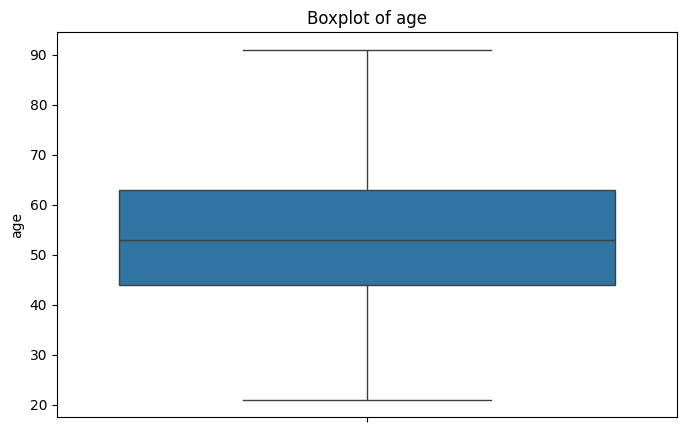

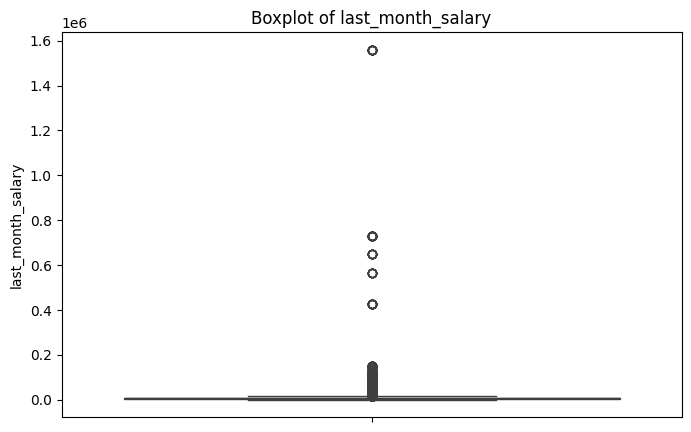

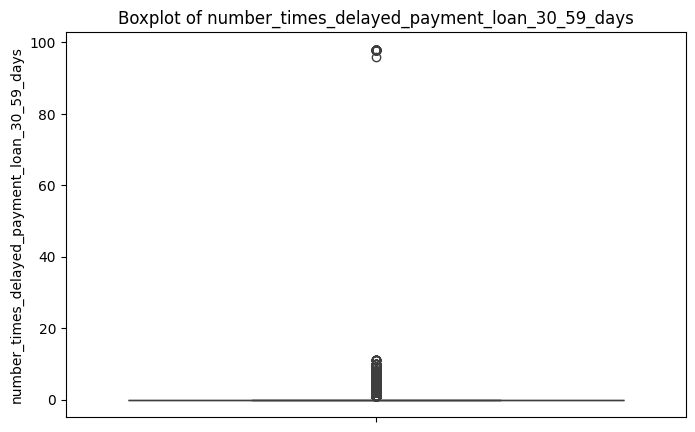

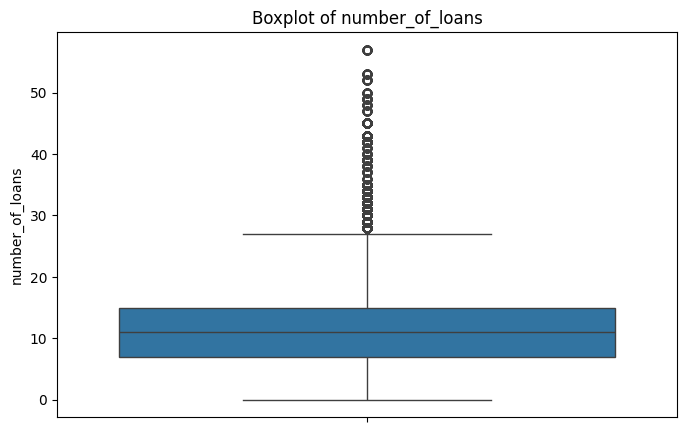

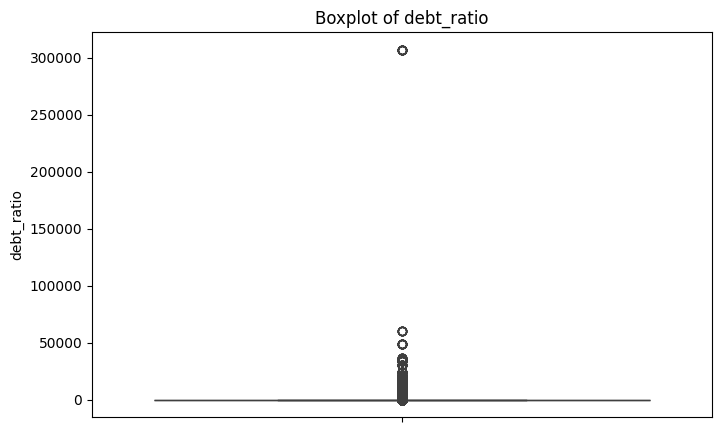

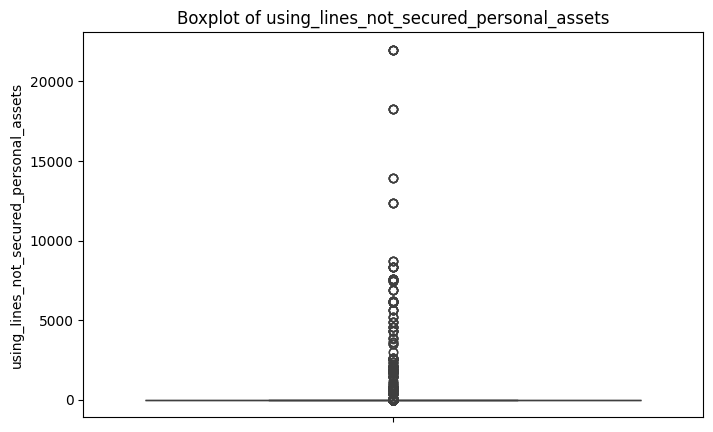

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (excluding the user_id, loan_id, and default_flag which is the target)
numerical_cols = merged_df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('user_id')
# Check if 'loan_id' is in the list before removing it
if 'loan_id' in numerical_cols:
    numerical_cols.remove('loan_id')
# Exclude the target variable 'default_flag' from feature boxplots
if 'default_flag' in numerical_cols:
    numerical_cols.remove('default_flag')
# Remove the original 'debt_ratio' and 'using_lines_not_secured_personal_assets' columns as they are replaced by engineered features
if 'debt_ratio' in numerical_cols:
    numerical_cols.remove('debt_ratio')
if 'using_lines_not_secured_personal_assets' in numerical_cols:
    numerical_cols.remove('using_lines_not_secured_personal_assets')
# Remove scaled and winsorized columns for visualization, keep original where appropriate
if 'last_month_salary_scaled' in numerical_cols:
    numerical_cols.remove('last_month_salary_scaled')
if 'number_of_loans_scaled' in numerical_cols:
    numerical_cols.remove('number_of_loans_scaled')
if 'debt_ratio_winsorized' in numerical_cols:
    numerical_cols.remove('debt_ratio_winsorized')
if 'using_lines_not_secured_personal_assets_transformed' in numerical_cols:
    numerical_cols.remove('using_lines_not_secured_personal_assets_transformed')
# Add back original columns for visualization if they were removed but are not redundant with original data
if 'number_of_loans' not in numerical_cols:
  numerical_cols.append('number_of_loans')
if 'debt_ratio' not in numerical_cols:
  numerical_cols.append('debt_ratio')
if 'using_lines_not_secured_personal_assets' not in numerical_cols:
  numerical_cols.append('using_lines_not_secured_personal_assets')


print("Visualizing numerical variable distributions with boxplots:")

for col in numerical_cols:
    # Note: These variables show a large number of outliers based on previous IQR analysis.
    # The boxplots accurately reflect this, which can make the central distribution
    # appear compressed. Visualizing transformed/winsorized versions might show
    # the main body of the data more clearly.
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=merged_df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

Exploring Categorical Variables:

Analyzing 'loan_type':
Value Counts:
loan_type
other          268772
real estate     36562
unknown           425
others              1
Name: count, dtype: int64


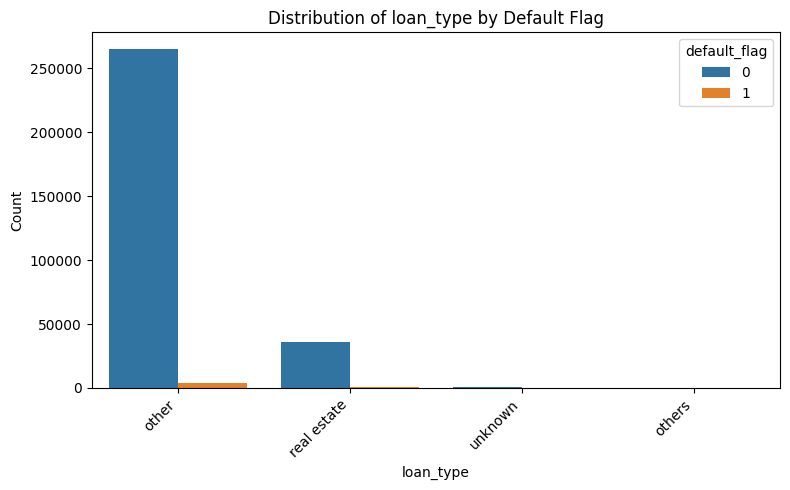

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns (excluding the user_id and loan_id)
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Exploring Categorical Variables:")

for col in categorical_cols:
    print(f"\nAnalyzing '{col}':")
    # Get value counts
    print("Value Counts:")
    print(merged_df[col].value_counts())

    # Visualize the distribution of the categorical variable
    plt.figure(figsize=(8, 5))
    sns.countplot(data=merged_df, x=col, hue='default_flag')
    plt.title(f'Distribution of {col} by Default Flag')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Get the correlation of all numerical variables with the 'default_flag'
correlation_with_default = correlation_matrix['default_flag'].sort_values(ascending=False)

print("Correlation with Default Flag:")
display(correlation_with_default)

Correlation with Default Flag:


,default_flag
default_flag,1.000000
number_times_delayed_payment_loan_30_59_days,0.261835
more_90_days_overdue,0.255517
number_times_delayed_payment_loan_60_89_days,0.201992
number_dependents,0.027730
using_lines_not_secured_personal_assets,-0.001869
loan_id,-0.005869
debt_ratio,-0.006512
user_id,-0.007951
last_month_salary,-0.014867


In [ ]:
# Identify numerical columns (excluding the user_id and loan_id which are identifiers)
numerical_cols = merged_df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('user_id')
# Check if 'loan_id' is in the list before removing it
if 'loan_id' in numerical_cols:
    numerical_cols.remove('loan_id')

print("Mean of numerical variables:")
display(merged_df[numerical_cols].mean())

print("\nMedian of numerical variables:")
display(merged_df[numerical_cols].median())

print("\nMode of numerical variables:")
display(merged_df[numerical_cols].mode().iloc[0]) # .iloc[0] is used because mode can return multiple values

Mean of numerical variables:


,0
age,5.365285e+01
last_month_salary,7.117579e+03
default_flag,1.430534e-02
using_lines_not_secured_personal_assets,3.875722e+00
number_times_delayed_payment_loan_30_59_days,3.022730e-01
debt_ratio,4.204879e+02
using_lines_not_secured_personal_assets_transformed,2.314234e-01
debt_ratio_winsorized,3.695833e+02
number_of_loans,1.163028e+01
last_month_salary_scaled,-1.524451e-17



Median of numerical variables:


,0
age,53.000000
last_month_salary,5400.000000
default_flag,0.000000
using_lines_not_secured_personal_assets,0.146791
number_times_delayed_payment_loan_30_59_days,0.000000
debt_ratio,0.410338
using_lines_not_secured_personal_assets_transformed,0.136968
debt_ratio_winsorized,0.410338
number_of_loans,11.000000
last_month_salary_scaled,-0.123559



Mode of numerical variables:


,0
age,63.000000
last_month_salary,5400.000000
default_flag,0.000000
using_lines_not_secured_personal_assets,0.000000
number_times_delayed_payment_loan_30_59_days,0.000000
debt_ratio,0.000000
using_lines_not_secured_personal_assets_transformed,0.000000
debt_ratio_winsorized,5743.000000
number_of_loans,9.000000
last_month_salary_scaled,-0.123559


In [ ]:
# Remove redundant original columns
columns_to_drop_redundant = ['debt_ratio', 'number_of_loans']
merged_df = merged_df.drop(columns=columns_to_drop_redundant)

# Display the first few rows to confirm the columns are removed
display(merged_df.head())

# Check the shape of the dataframe after dropping columns
print("\nShape of the dataframe after removing redundant columns:", merged_df.shape)

,user_id,age,last_month_salary,default_flag,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,loan_id,loan_type,using_lines_not_secured_personal_assets_transformed,debt_ratio_winsorized,last_month_salary_scaled,number_of_loans_scaled
0,1,55.0,2200.0,0,0.667083,0,36563.0,other,0.511076,0.153112,-0.353760,-1.399352
1,1,55.0,2200.0,0,0.667083,0,36564.0,other,0.511076,0.153112,-0.353760,-1.399352
2,1,55.0,2200.0,0,0.667083,0,36565.0,other,0.511076,0.153112,-0.353760,-1.399352
3,2,44.0,7499.0,0,0.007093,0,1.0,real estate,0.007067,0.148800,0.027439,1.357103
4,2,44.0,7499.0,0,0.007093,0,36566.0,other,0.007067,0.148800,0.027439,1.357103



Shape of the dataframe after removing redundant columns: (305760, 12)


In [ ]:
import statsmodels.api as sm

# Define the variable to analyze
variable_to_analyze = 'number_times_delayed_payment_loan_30_59_days'

# Calculate overall default rate (for the reference group)
overall_default_rate = merged_df['default_flag'].mean()

print(f"Overall Default Rate: {overall_default_rate:.4f}")

# Group by the variable and calculate counts of defaulters and non-defaulters
risk_groups = merged_df.groupby(variable_to_analyze)['default_flag'].agg(['count', 'sum']).reset_index()
risk_groups.columns = [variable_to_analyze, 'total_count', 'default_count']

# Calculate non-default count
risk_groups['non_default_count'] = risk_groups['total_count'] - risk_groups['default_count']

# Apply smoothing (+0.5 to all counts)
risk_groups['default_count_smoothed'] = risk_groups['default_count'] + 0.5
risk_groups['non_default_count_smoothed'] = risk_groups['non_default_count'] + 0.5
risk_groups['total_count_smoothed'] = risk_groups['total_count'] + 1 # Adding 0.5 to both default and non-default adds 1 to total

# Calculate smoothed default rate for each group
risk_groups['default_rate_smoothed'] = risk_groups['default_count_smoothed'] / risk_groups['total_count_smoothed']

# Calculate Relative Risk (RR) for each group compared to the overall default rate
# Add smoothing to the overall default rate calculation as well for consistency
overall_default_count_smoothed = merged_df['default_flag'].sum() + 0.5
overall_total_count_smoothed = len(merged_df) + 1
overall_default_rate_smoothed = overall_default_count_smoothed / overall_total_count_smoothed

risk_groups['relative_risk'] = risk_groups['default_rate_smoothed'] / overall_default_rate_smoothed

# Calculate Confidence Intervals for Relative Risk
# Using the log of the RR and its standard error for confidence interval calculation (Wald method)
risk_groups['log_rr'] = np.log(risk_groups['relative_risk'])

# Calculate standard error of the log RR
# Formula: SE(log(RR)) = sqrt( (1/default_count_smoothed) - (1/total_count_smoothed) + (1/overall_default_count_smoothed) - (1/overall_total_count_smoothed) )
risk_groups['se_log_rr'] = np.sqrt(
    (1 / risk_groups['default_count_smoothed']) - (1 / risk_groups['total_count_smoothed']) +
    (1 / overall_default_count_smoothed) - (1 / overall_total_count_smoothed)
)

# Calculate the margin of error for a 95% Confidence Interval (using z-score of 1.96)
z_score = 1.96
risk_groups['margin_of_error'] = z_score * risk_groups['se_log_rr']

# Calculate the lower and upper bounds of the log RR confidence interval
risk_groups['log_rr_lower'] = risk_groups['log_rr'] - risk_groups['margin_of_error']
risk_groups['log_rr_upper'] = risk_groups['log_rr'] + risk_groups['margin_of_error']

# Exponentiate the log RR confidence interval to get the RR confidence interval
risk_groups['rr_lower_ci'] = np.exp(risk_groups['log_rr_lower'])
risk_groups['rr_upper_ci'] = np.exp(risk_groups['log_rr_upper'])


print(f"\nRelative Risk for '{variable_to_analyze}' groups compared to overall default rate:")
display(risk_groups[[variable_to_analyze, 'total_count', 'default_count', 'default_rate_smoothed', 'relative_risk', 'rr_lower_ci', 'rr_upper_ci']])

Overall Default Rate: 0.0143

Relative Risk for 'number_times_delayed_payment_loan_30_59_days' groups compared to overall default rate:


,number_times_delayed_payment_loan_30_59_days,total_count,default_count,default_rate_smoothed,relative_risk,rr_lower_ci,rr_upper_ci
0,0,252170,332,0.001319,0.092162,0.082448,0.103019
1,1,35316,1071,0.030339,2.120616,1.985383,2.265060
2,2,10558,865,0.081968,5.729252,5.340382,6.146439
3,3,3959,739,0.186742,13.052589,12.153773,14.017876
4,4,1968,727,0.369477,25.825037,24.205374,27.553077
5,5,945,250,0.264799,18.508459,16.577463,20.664384
6,6,446,174,0.390380,27.286107,24.212093,30.750404
7,7,155,95,0.612179,42.789030,37.636008,48.647590
8,8,82,12,0.150602,10.526539,6.309957,17.560820
9,9,69,41,0.592857,41.438471,34.050927,50.428787


In [ ]:
# Encode the 'loan_type' categorical variable using one-hot encoding
merged_df = pd.get_dummies(merged_df, columns=['loan_type'], prefix='loan_type', dummy_na=False)

# Display the first few rows to see the new dummy variables
display(merged_df.head())

# Check the columns to see the new dummy variables
print("\nColumns after one-hot encoding 'loan_type':")
print(merged_df.columns)

,user_id,age,last_month_salary,default_flag,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,loan_id,using_lines_not_secured_personal_assets_transformed,debt_ratio_winsorized,last_month_salary_scaled,number_of_loans_scaled,loan_type_other,loan_type_others,loan_type_real estate,loan_type_unknown
0,1,55.0,2200.0,0,0.667083,0,36563.0,0.511076,0.153112,-0.353760,-1.399352,True,False,False,False
1,1,55.0,2200.0,0,0.667083,0,36564.0,0.511076,0.153112,-0.353760,-1.399352,True,False,False,False
2,1,55.0,2200.0,0,0.667083,0,36565.0,0.511076,0.153112,-0.353760,-1.399352,True,False,False,False
3,2,44.0,7499.0,0,0.007093,0,1.0,0.007067,0.148800,0.027439,1.357103,False,False,True,False
4,2,44.0,7499.0,0,0.007093,0,36566.0,0.007067,0.148800,0.027439,1.357103,True,False,False,False



Columns after one-hot encoding 'loan_type':
Index(['user_id', 'age', 'last_month_salary', 'default_flag',
       'using_lines_not_secured_personal_assets',
       'number_times_delayed_payment_loan_30_59_days', 'loan_id',
       'using_lines_not_secured_personal_assets_transformed',
       'debt_ratio_winsorized', 'last_month_salary_scaled',
       'number_of_loans_scaled', 'loan_type_other', 'loan_type_others',
       'loan_type_real estate', 'loan_type_unknown'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Exclude identifier columns and the original columns that have engineered/scaled versions
X = merged_df.drop(columns=['user_id', 'loan_id', 'default_flag',
                            'last_month_salary', 'using_lines_not_secured_personal_assets']) # Exclude original versions

y = merged_df['default_flag']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for imbalanced target

print("Data splitting complete.")
print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)

# Check the proportion of default in train and test sets (should be similar due to stratify)
print("\nProportion of default in y_train:", y_train.mean())
print("Proportion of default in y_test:", y_test.mean())

Data splitting complete.
Shape of training data (X_train): (244608, 10)
Shape of testing data (X_test): (61152, 10)
Shape of training labels (y_train): (244608,)
Shape of testing labels (y_test): (61152,)

Proportion of default in y_train: 0.014304519884877027
Proportion of default in y_test: 0.014308608058608058


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Increased max_iter to ensure convergence and added class_weight='balanced'
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully with balanced class weights.")

Logistic Regression model trained successfully with balanced class weights.


Model Evaluation Metrics:
Accuracy: 0.9163
Precision: 0.1402
Recall: 0.9451
F1-Score: 0.2442
ROC AUC: 0.9736

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,55206,5071
Actual 1,48,827



ROC Curve:


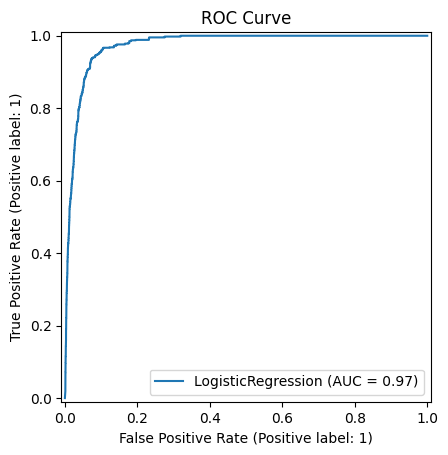

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (default=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\nConfusion Matrix:")
display(pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

# Plot the ROC curve
print("\nROC Curve:")
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
from scipy.stats import ks_2samp

# Calculate PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

print(f"PR-AUC: {pr_auc:.4f}")

PR-AUC: 0.3286


In [ ]:
import xgboost as xgb

# Initialize the XGBoost classifier
# Use scale_pos_weight to handle class imbalance
# The value for scale_pos_weight is typically the ratio of the number of negative class to the positive class
scale_pos_weight_value = sum(y_train == 0) / sum(y_train == 1)

model_xgb = xgb.XGBClassifier(
    objective='binary:logistic', # Binary classification
    eval_metric='logloss',       # Evaluation metric
    seed=42,
    scale_pos_weight=scale_pos_weight_value # Handle imbalance
)

# Train the model
model_xgb.fit(X_train, y_train)

print("XGBoost model trained successfully with scale_pos_weight.")

XGBoost model trained successfully with scale_pos_weight.


XGBoost Model Evaluation Metrics:
Accuracy: 0.9936
Precision: 0.6942
Recall: 0.9909
F1-Score: 0.8164
ROC AUC: 0.9997
PR-AUC: 0.9844

Confusion Matrix (XGBoost):


,Predicted 0,Predicted 1
Actual 0,59895,382
Actual 1,8,867



ROC Curve (XGBoost):


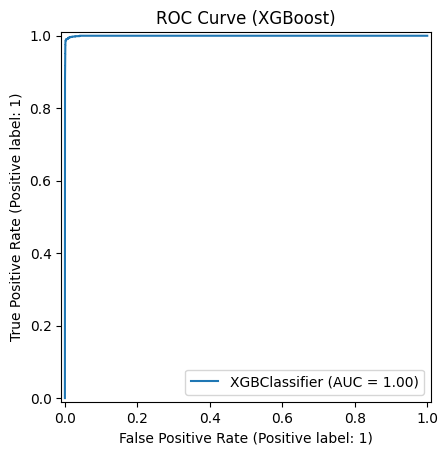

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Make predictions on the testing data
y_pred_xgb = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (default=1)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate PR-AUC
precision_xgb_pr, recall_xgb_pr, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
pr_auc_xgb = auc(recall_xgb_pr, precision_xgb_pr)

# Display the metrics
print("XGBoost Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")
print(f"PR-AUC: {pr_auc_xgb:.4f}")

print("\nConfusion Matrix (XGBoost):")
display(pd.DataFrame(conf_matrix_xgb, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

# Plot the ROC curve
print("\nROC Curve (XGBoost):")
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test)
plt.title('ROC Curve (XGBoost)')
plt.show()